# Email Spam Detection using Decision Tree Algorithm

In [287]:
import pandas as pd
import re
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix




In [288]:
# Define the list of spam tokens to search for

tokens = ["free", "offer", "winner", "lottery", "lucky", "now"]

def count_words_all_caps(text):
    words = text.split()
    return sum(1 for word in words if word.isupper())
    #comprehensive for list (pour traverser list words)

def count_total_words(text):
    words = text.split()
    return len(words)

def count_exclamations_question_marks(text):
    return text.count('!') + text.count('?')

def count_tokens_http(text):
    return len(re.findall(r'\bhttp\b', text))
    #(re :reg ex)
   
    
# Count the number of spam tokens ("free", "offer", "winner", "lottery", "lucky", "now")
def count_tokens(text, tokens):
    text_lower = text.lower()
    count = 0
    for token in tokens:
        count += len(re.findall(r'\b{}\b'.format(token), text_lower))
    return count


In [289]:
# Load the TSV file into a dataframe
def load_data(file_path):
    df = pd.read_csv(file_path, delimiter='\t')
    return df
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [290]:
# Function to process the dataframe and compute feature values
# Compute new features from each email text 
# i created a new data base called features with 5 dimension(5 features)
def process_data(df):
    features = pd.DataFrame()
    features['num_words_all_caps'] = df['text'].apply(count_words_all_caps)
    features['num_total_words'] = df['text'].apply(count_total_words)
    features['num_exclamations_question_marks'] = df['text'].apply(count_exclamations_question_marks)
    features['num_tokens_http'] = df['text'].apply(count_tokens_http)
    features['num_tokens'] = df['text'].apply(count_tokens, tokens=tokens)
    return features



In [291]:
# Function to perform spam classification using decision tree
#( features, target_value: spam or not spam)
def classify_spam(features, target_values):
  
    # Create a decision tree classifier
    #(max_leaf_nodes=5, random_state=0)
    
    classifier = DecisionTreeClassifier()

    # Train-test split (80% train,  20% test)
    X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)
    #(X : feature , y : 0/1 target-label)
    

    # Train the classifier using the training set
    classifier.fit(X_train, y_train)
    
    # Calculate positive count and negative count in the train set
    positive_count_tr = sum(y_train == 1)
    negative_count_tr = sum(y_train == 0)

    # Print the results
    print("Positive Count in Train:", positive_count_tr)
    print("Negative Count in Train:", negative_count_tr)
    
    # Calculate positive count and negative count in the test set
    positive_count = sum(y_test == 1)
    negative_count = sum(y_test == 0)

    # Print the results
    print("Positive Count in Test:", positive_count)
    print("Negative Count in Test:", negative_count)


    # Evaluate the classifier on the test set
    test_accuracy = classifier.score(X_test, y_test)
    print("Test Accuracy:", test_accuracy)
    
    # Evaluate precision
    precision = precision_score(y_test, classifier.predict(X_test))
    print("Precision:", precision)

    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, classifier.predict(X_test)).ravel()


    # Print confusion matrix results the results
    print("True Positives:", tp)
    print("True Negatives:", tn)

    print("False Positives:", fp)
    print("False Negatives:", fn)
    
    # Visualize the decision tree
    plt.figure(figsize=(10, 8))
    plot_tree(classifier, filled=True, feature_names=X_train.columns)
    plt.show()


In [292]:
# Specify the path to your TSV file
file_path = 'spam_dataset.tsv'


In [293]:
# Load the data from the TSV file
df = load_data(file_path)


In [294]:
# Extract target values of spam and non spam

target_values = df['target']

In [295]:
# Process the dataframe and compute feature values
features = process_data(df)

In [296]:
features.head(10)

,num_words_all_caps,num_total_words,num_exclamations_question_marks,num_tokens_http,num_tokens
0,26,558,3,2,0
1,10,295,8,2,3
2,19,386,10,7,2
3,15,153,1,2,2
4,31,397,1,1,0
5,8,273,4,2,1
6,19,231,6,1,1
7,20,369,7,5,0
8,25,373,4,0,0
9,75,554,4,1,0


Positive Count in Train: 1507
Negative Count in Train: 2891
Positive Count in Test: 344
Negative Count in Test: 756
Test Accuracy: 0.8409090909090909
Precision: 0.7241379310344828
True Positives: 273
True Negatives: 652
False Positives: 104
False Negatives: 71


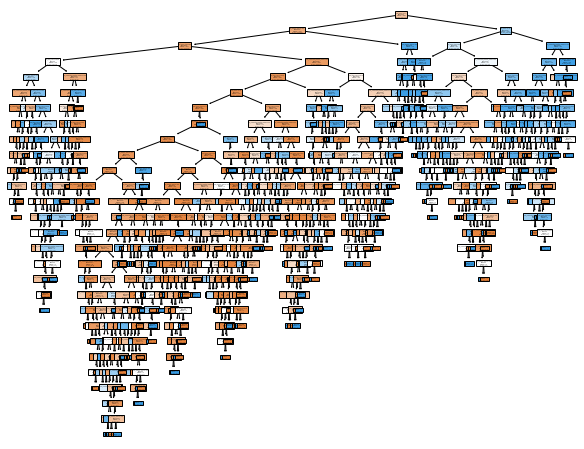

In [297]:
# Perform spam classification using decision tree
classify_spam(features, target_values)